In [1]:
import pandas as pd
import numpy as np
import random

In [9]:
# Custom series 
s = pd.Series([10, 20, 30, np.nan], index=['a', 'b', 'c', 'd'])
# The np nan forces the dtype to be float64

In [10]:
s.shape

(4,)

In [11]:
s

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64

In [ ]:
s.head()

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64

In [8]:
s.tail()

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64

In [9]:
s.describe()

count     3.0
mean     20.0
std      10.0
min      10.0
25%      15.0
50%      20.0
75%      25.0
max      30.0
dtype: float64

In [10]:
s.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, a to d
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


In [14]:
df = pd.DataFrame({
    'A': np.random.rand(5)* np.random.choice([10, 100, 1000], p=[0.5, 0.3, 0.2], size=5),
    'B': random.choices(['X', 'Y', 'Z'], k=5),
    'C': pd.date_range('20230101', periods=5)
})

In [15]:
df.head()

,A,B,C
0,737.445143,Z,2023-01-01
1,97.662903,Y,2023-01-02
2,98.797047,Y,2023-01-03
3,2.874016,Y,2023-01-04
4,47.691473,X,2023-01-05


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       5 non-null      float64       
 1   B       5 non-null      object        
 2   C       5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 248.0+ bytes


In [17]:
df.describe()

,A,C
count,5.000000,5
mean,196.894116,2023-01-03 00:00:00
min,2.874016,2023-01-01 00:00:00
25%,47.691473,2023-01-02 00:00:00
50%,97.662903,2023-01-03 00:00:00
75%,98.797047,2023-01-04 00:00:00
max,737.445143,2023-01-05 00:00:00
std,304.782918,NaN


In [20]:
df["A"]

0    737.445143
1     97.662903
2     98.797047
3      2.874016
4     47.691473
Name: A, dtype: float64

In [23]:
df[["C", "A"]]

,C,A
0,2023-01-01,737.445143
1,2023-01-02,97.662903
2,2023-01-03,98.797047
3,2023-01-04,2.874016
4,2023-01-05,47.691473


In [24]:
df["A"] > 20

0     True
1     True
2     True
3    False
4     True
Name: A, dtype: bool

In [25]:
df[df["A"] > 20]

,A,B,C
0,737.445143,Z,2023-01-01
1,97.662903,Y,2023-01-02
2,98.797047,Y,2023-01-03
4,47.691473,X,2023-01-05


In [28]:
df[(df["A"] > 20) & (df["B"] == "X")]

,A,B,C
4,47.691473,X,2023-01-05


In [29]:
df["A"].mean()

np.float64(196.89411621551477)

In [30]:
df["A"].agg(["mean", "max"])

mean    196.894116
max     737.445143
Name: A, dtype: float64

In [31]:
df.groupby("B").agg({"A": ["mean", "max"], "C": "count"})

A                 C
         mean         max count
B                              
X   47.691473   47.691473     1
Y   66.444655   98.797047     3
Z  737.445143  737.445143     1

In [32]:
df.loc[2, "A"]

np.float64(98.7970473182746)

In [33]:
df.loc[:, "B"]

0    Z
1    Y
2    Y
3    Y
4    X
Name: B, dtype: object

In [ ]:
df.iloc[2, 0]

np.float64(98.7970473182746)

In [35]:
df.iloc[:,:]

,A,B,C
0,737.445143,Z,2023-01-01
1,97.662903,Y,2023-01-02
2,98.797047,Y,2023-01-03
3,2.874016,Y,2023-01-04
4,47.691473,X,2023-01-05


In [40]:
df = pd.DataFrame({
    'ID': np.int64(np.random.rand(50)* 10000),
    'Department': random.choices(['Sales', 'Salsa', 'Marketing'], weights=[0.4,0.1,0.5],  k=50),
    'Salary': np.random.rand(50)* 100
})

In [42]:
# set random values as nan
for _ in range(10):
    ix = np.random.randint(0, 50)
    col = random.choices(['Department', 'Salary'], weights=[0.3,0.7])[0]
    df.at[ix, col] = np.nan
    

In [45]:
df.tail(10)

,ID,Department,Salary
40,300,Salsa,NaN
41,762,Sales,22.824724
42,9386,Marketing,2.720253
43,2643,NaN,25.603551
44,2154,Marketing,11.658042
45,5035,Marketing,65.037172
46,5616,Marketing,35.927008
47,9807,Marketing,34.970865
48,2080,Marketing,50.072034
49,7139,Marketing,71.093319


In [49]:
df.isna().sum().sum()

np.int64(10)

In [50]:
#fill in missing departments with the most frequent department
df["Department"] = df["Department"].fillna(df["Department"].mode()[0])

In [51]:
#df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
# fill missing salaries with the mean salary of the position
df["Salary"] = df.groupby("Department")["Salary"].transform(lambda x: x.fillna(x.mean()))

In [52]:
df.head()

,ID,Department,Salary
0,3110,Salsa,64.335121
1,3557,Sales,32.586814
2,8042,Sales,55.327069
3,4540,Marketing,57.600984
4,4983,Marketing,72.862869


In [53]:
df.head()

,ID,Department,Salary
0,3110,Salsa,64.335121
1,3557,Sales,32.586814
2,8042,Sales,55.327069
3,4540,Marketing,57.600984
4,4983,Marketing,72.862869


In [54]:
import seaborn as sns

In [55]:
df["DepartmentID"] = df["Department"].astype('category').cat.codes

<Axes: >

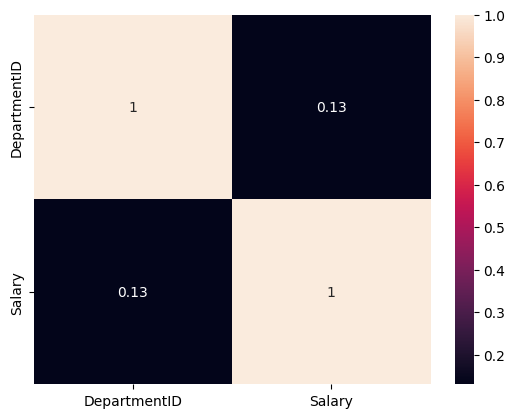

In [56]:
corr = df[["DepartmentID", "Salary"]].corr()
sns.heatmap(corr, annot=True)